#Assignment_1(CS577_Deep_Learning)

#Theory Questions(Q1,Q2,Q3)

###Question-1) Answer:

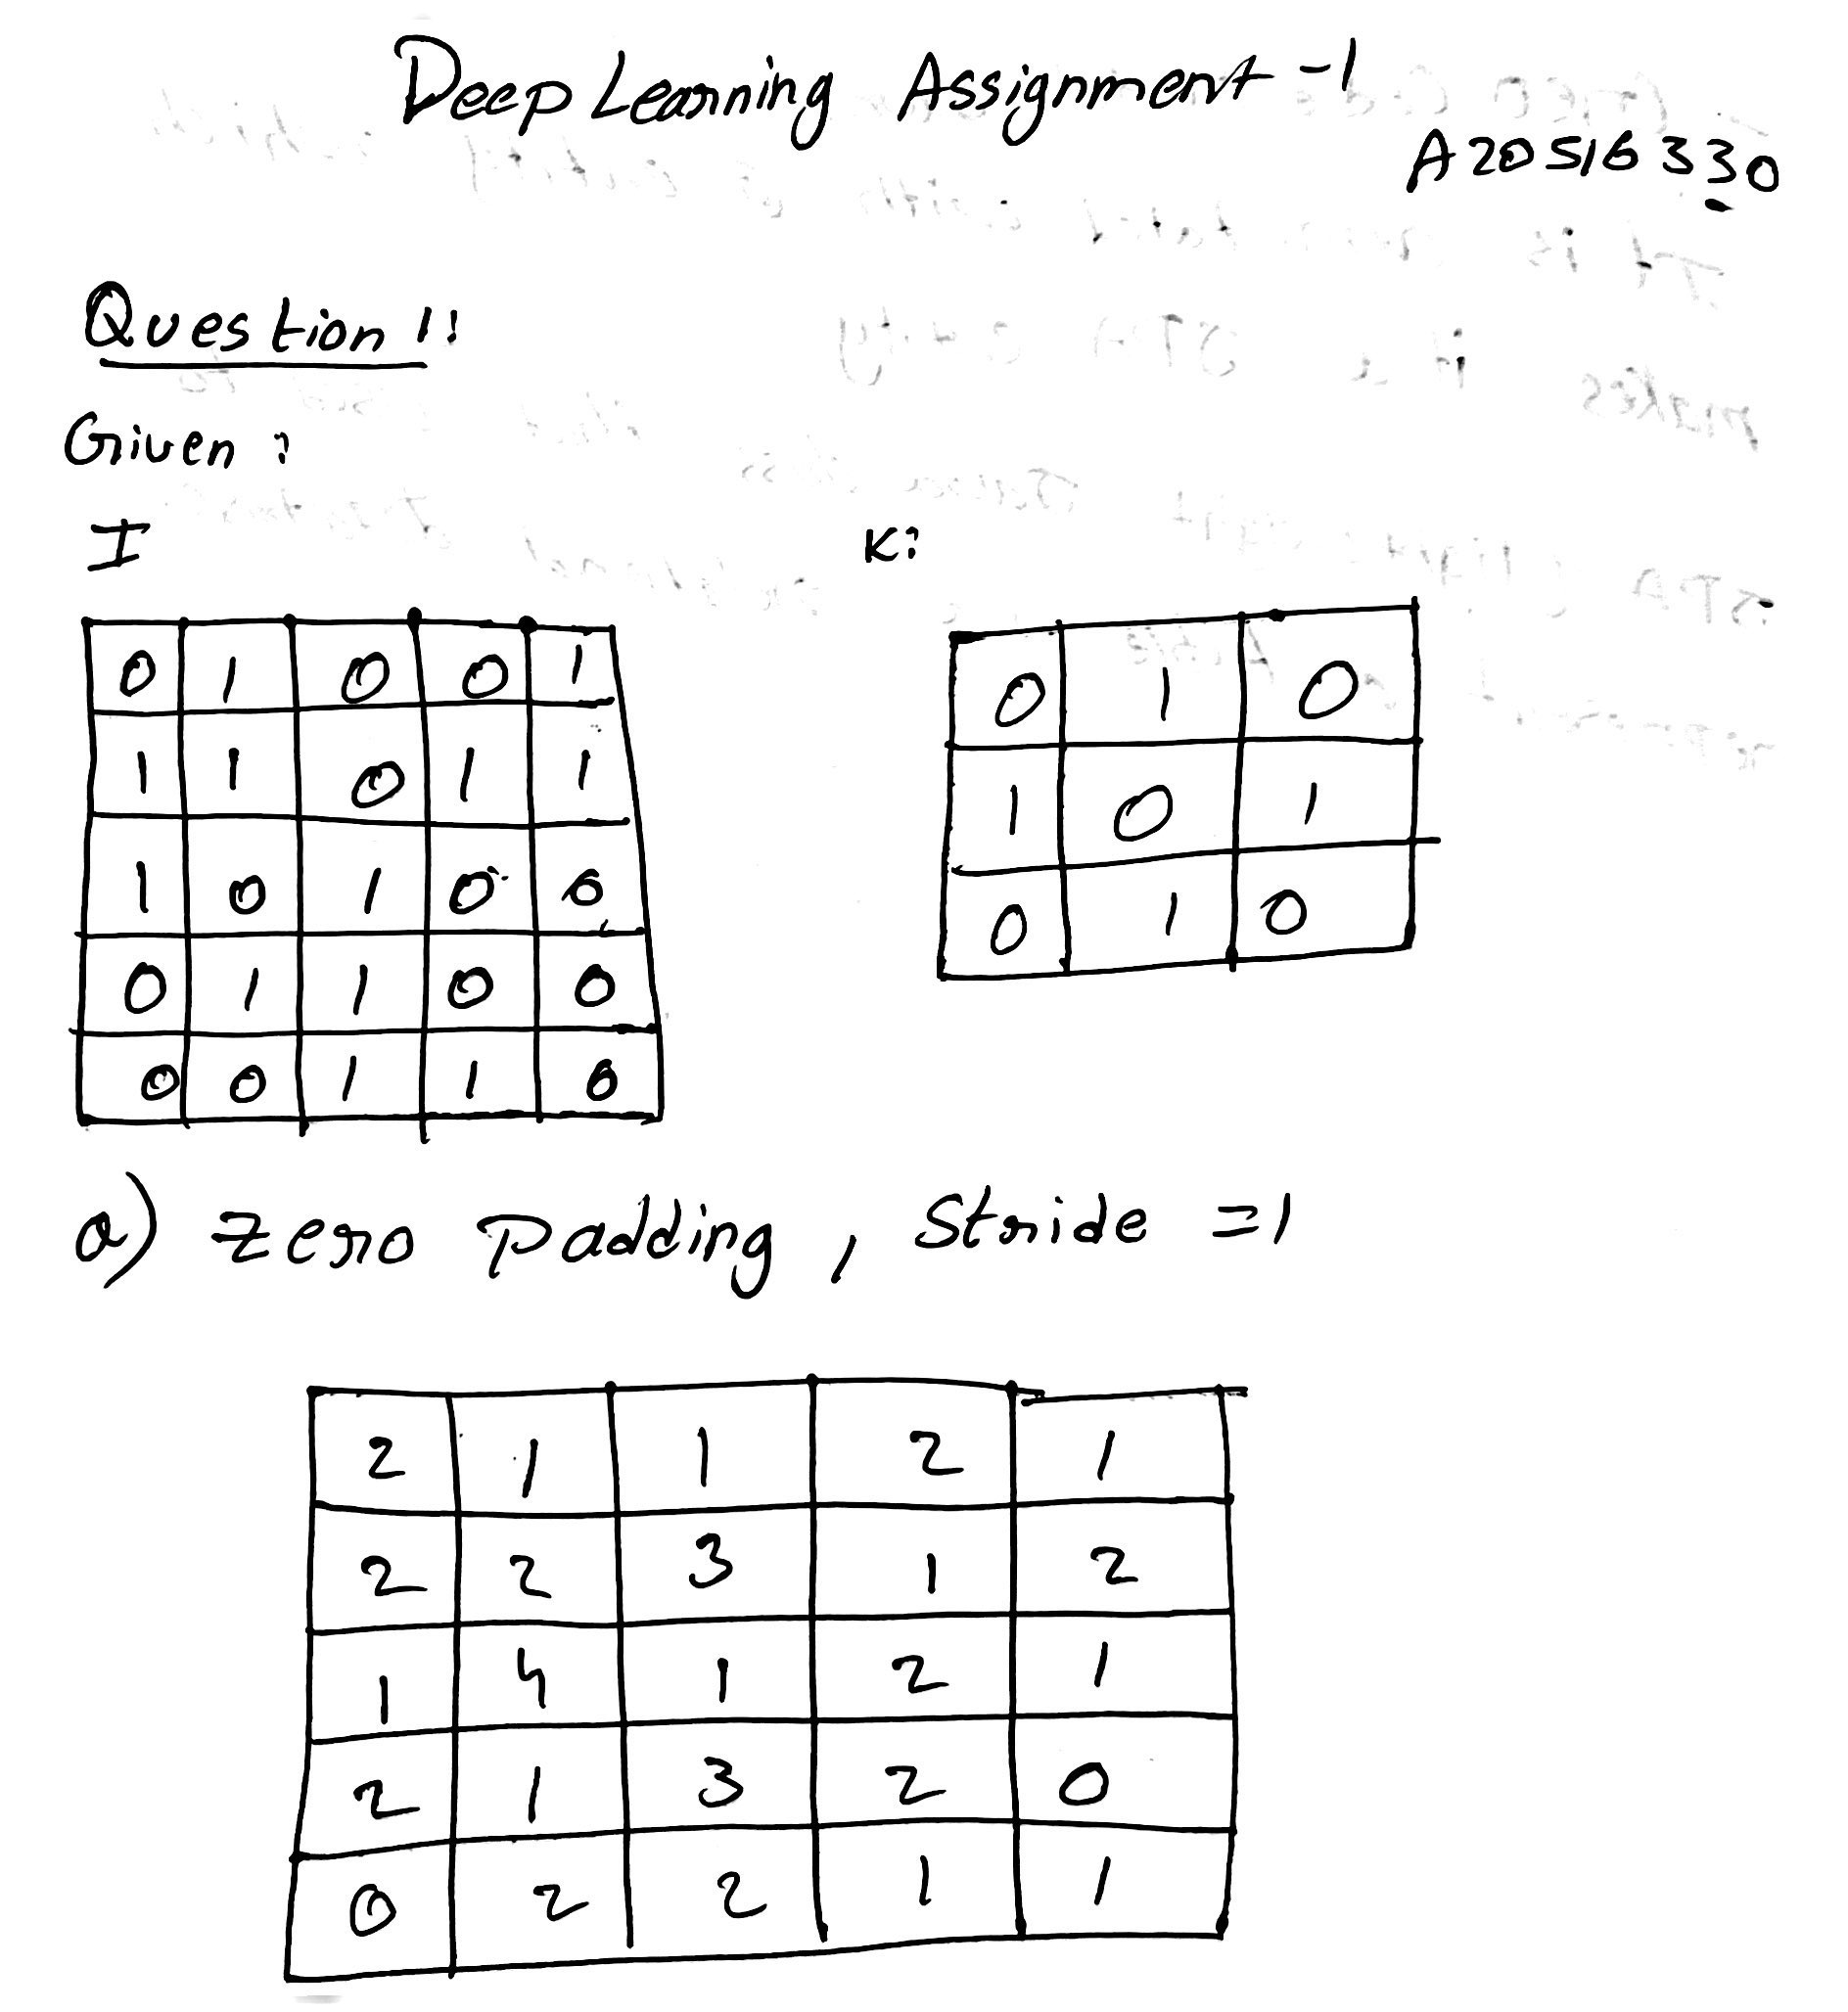

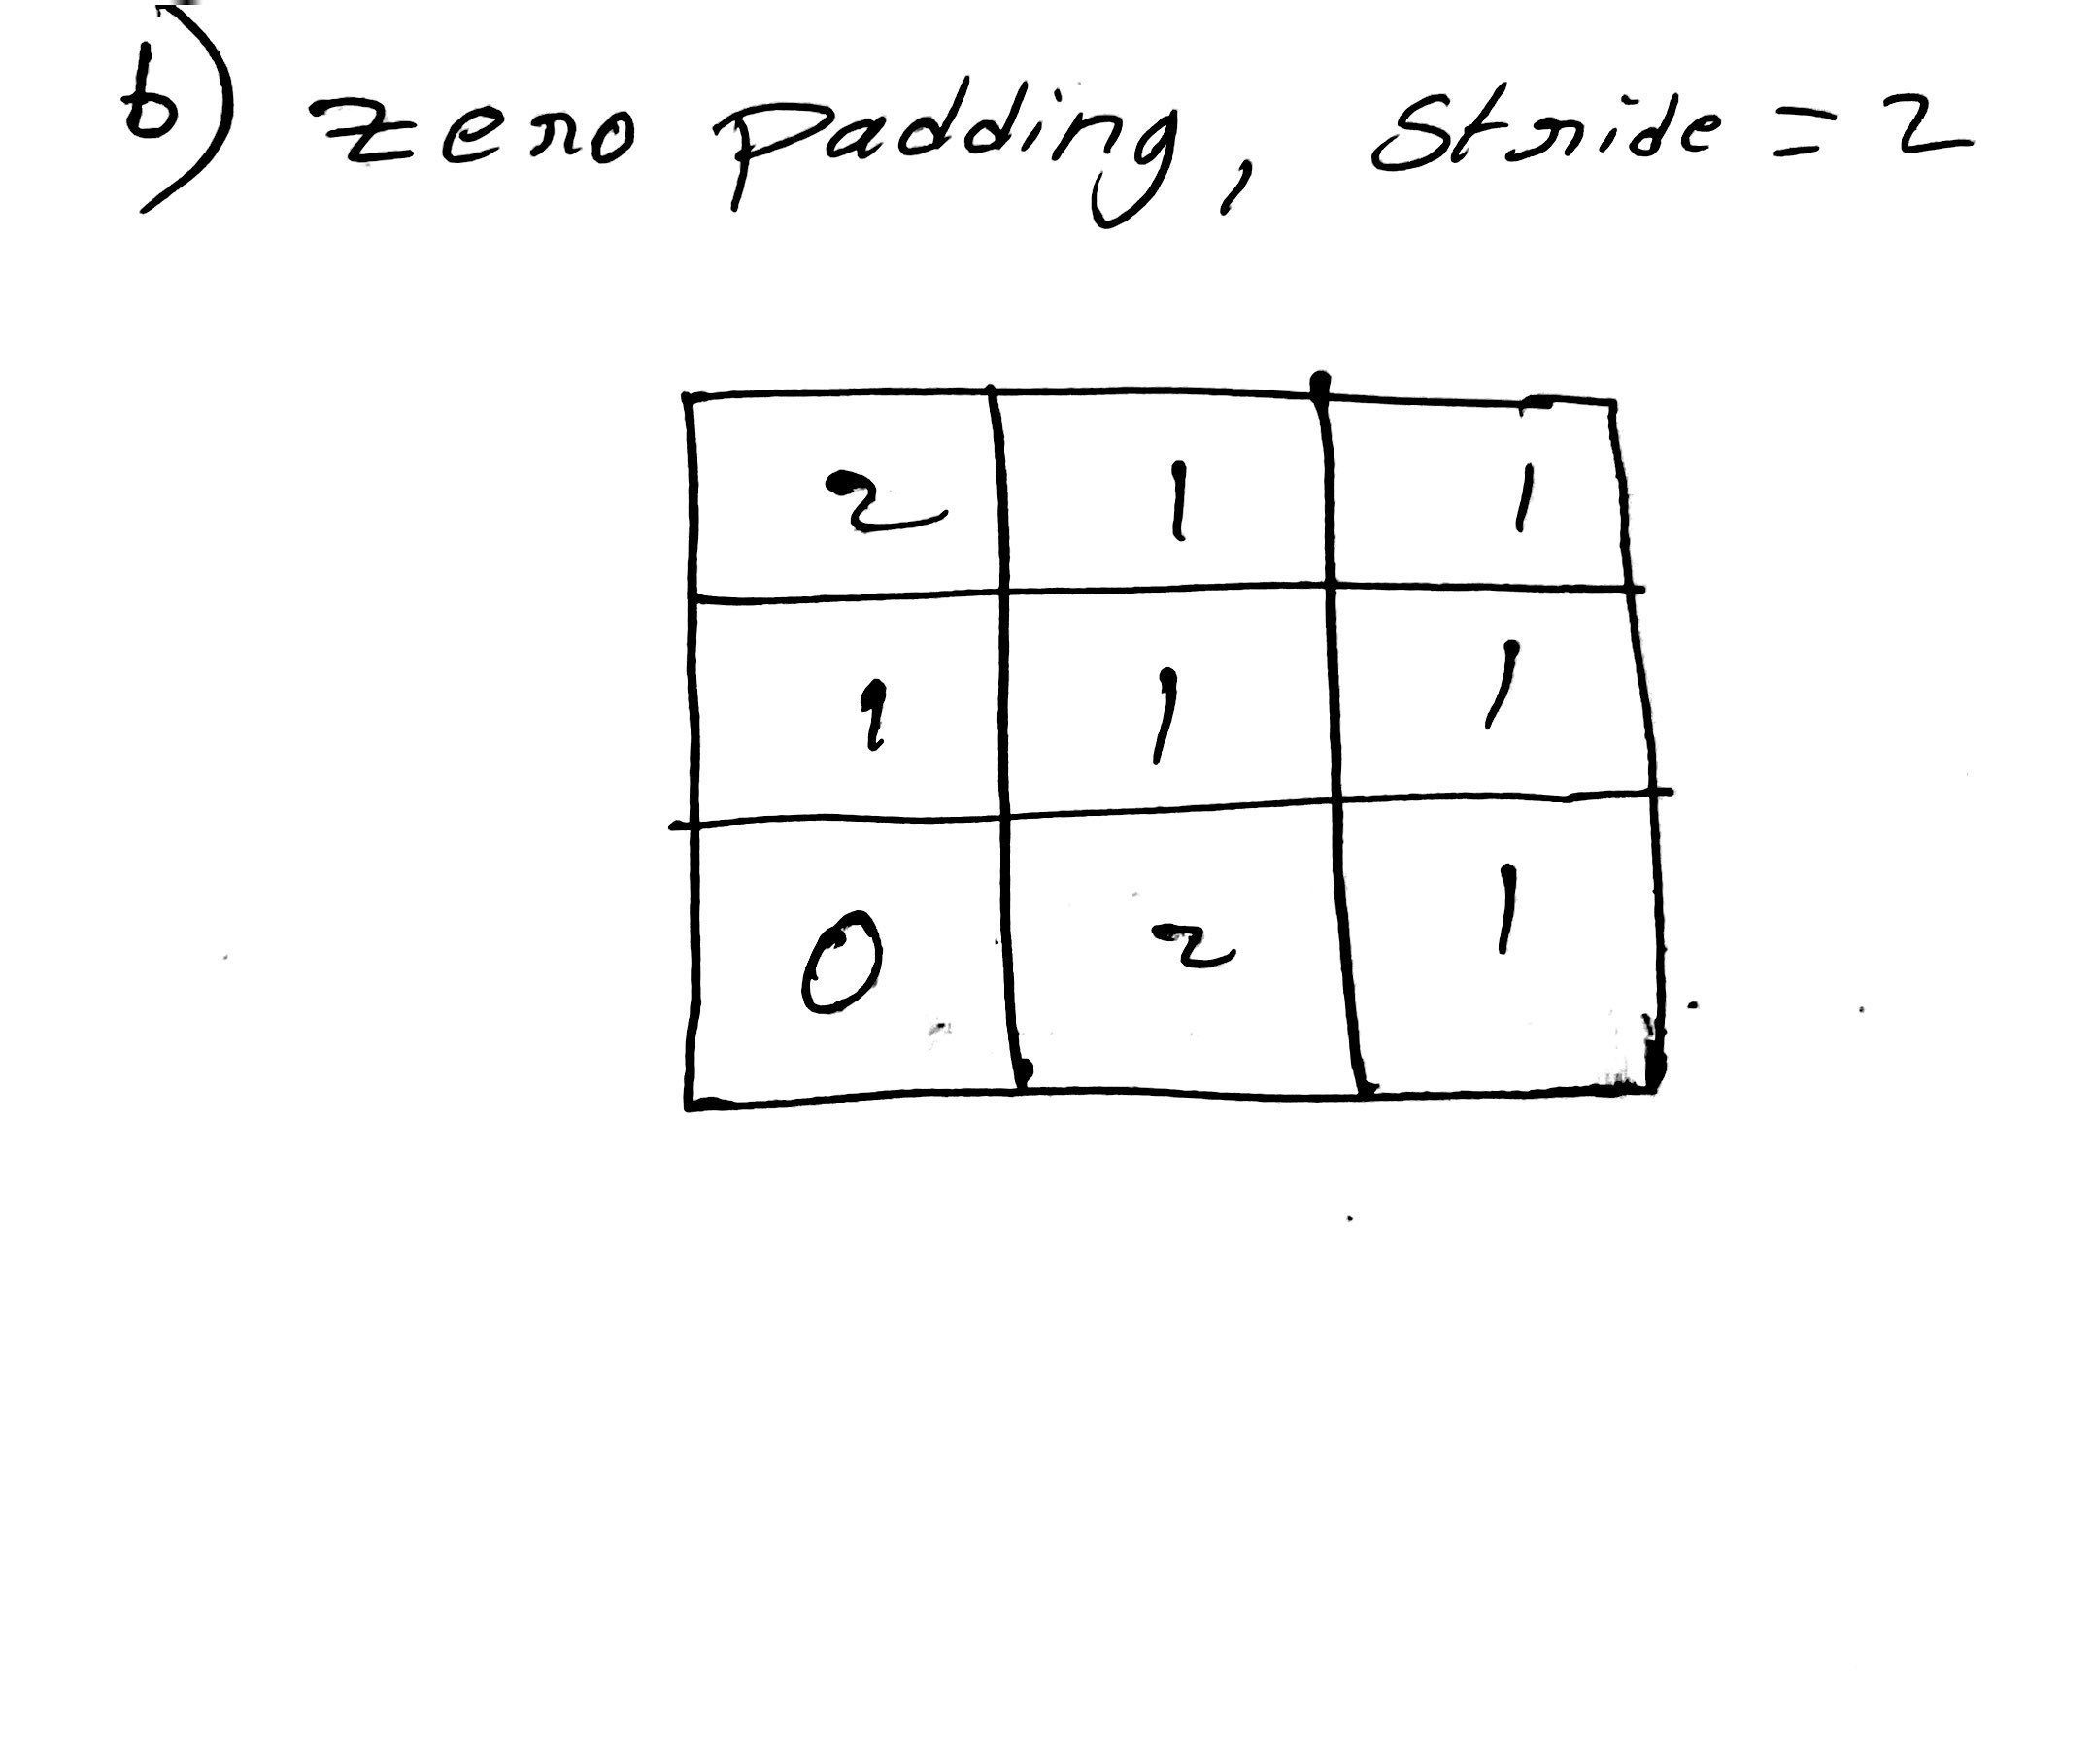

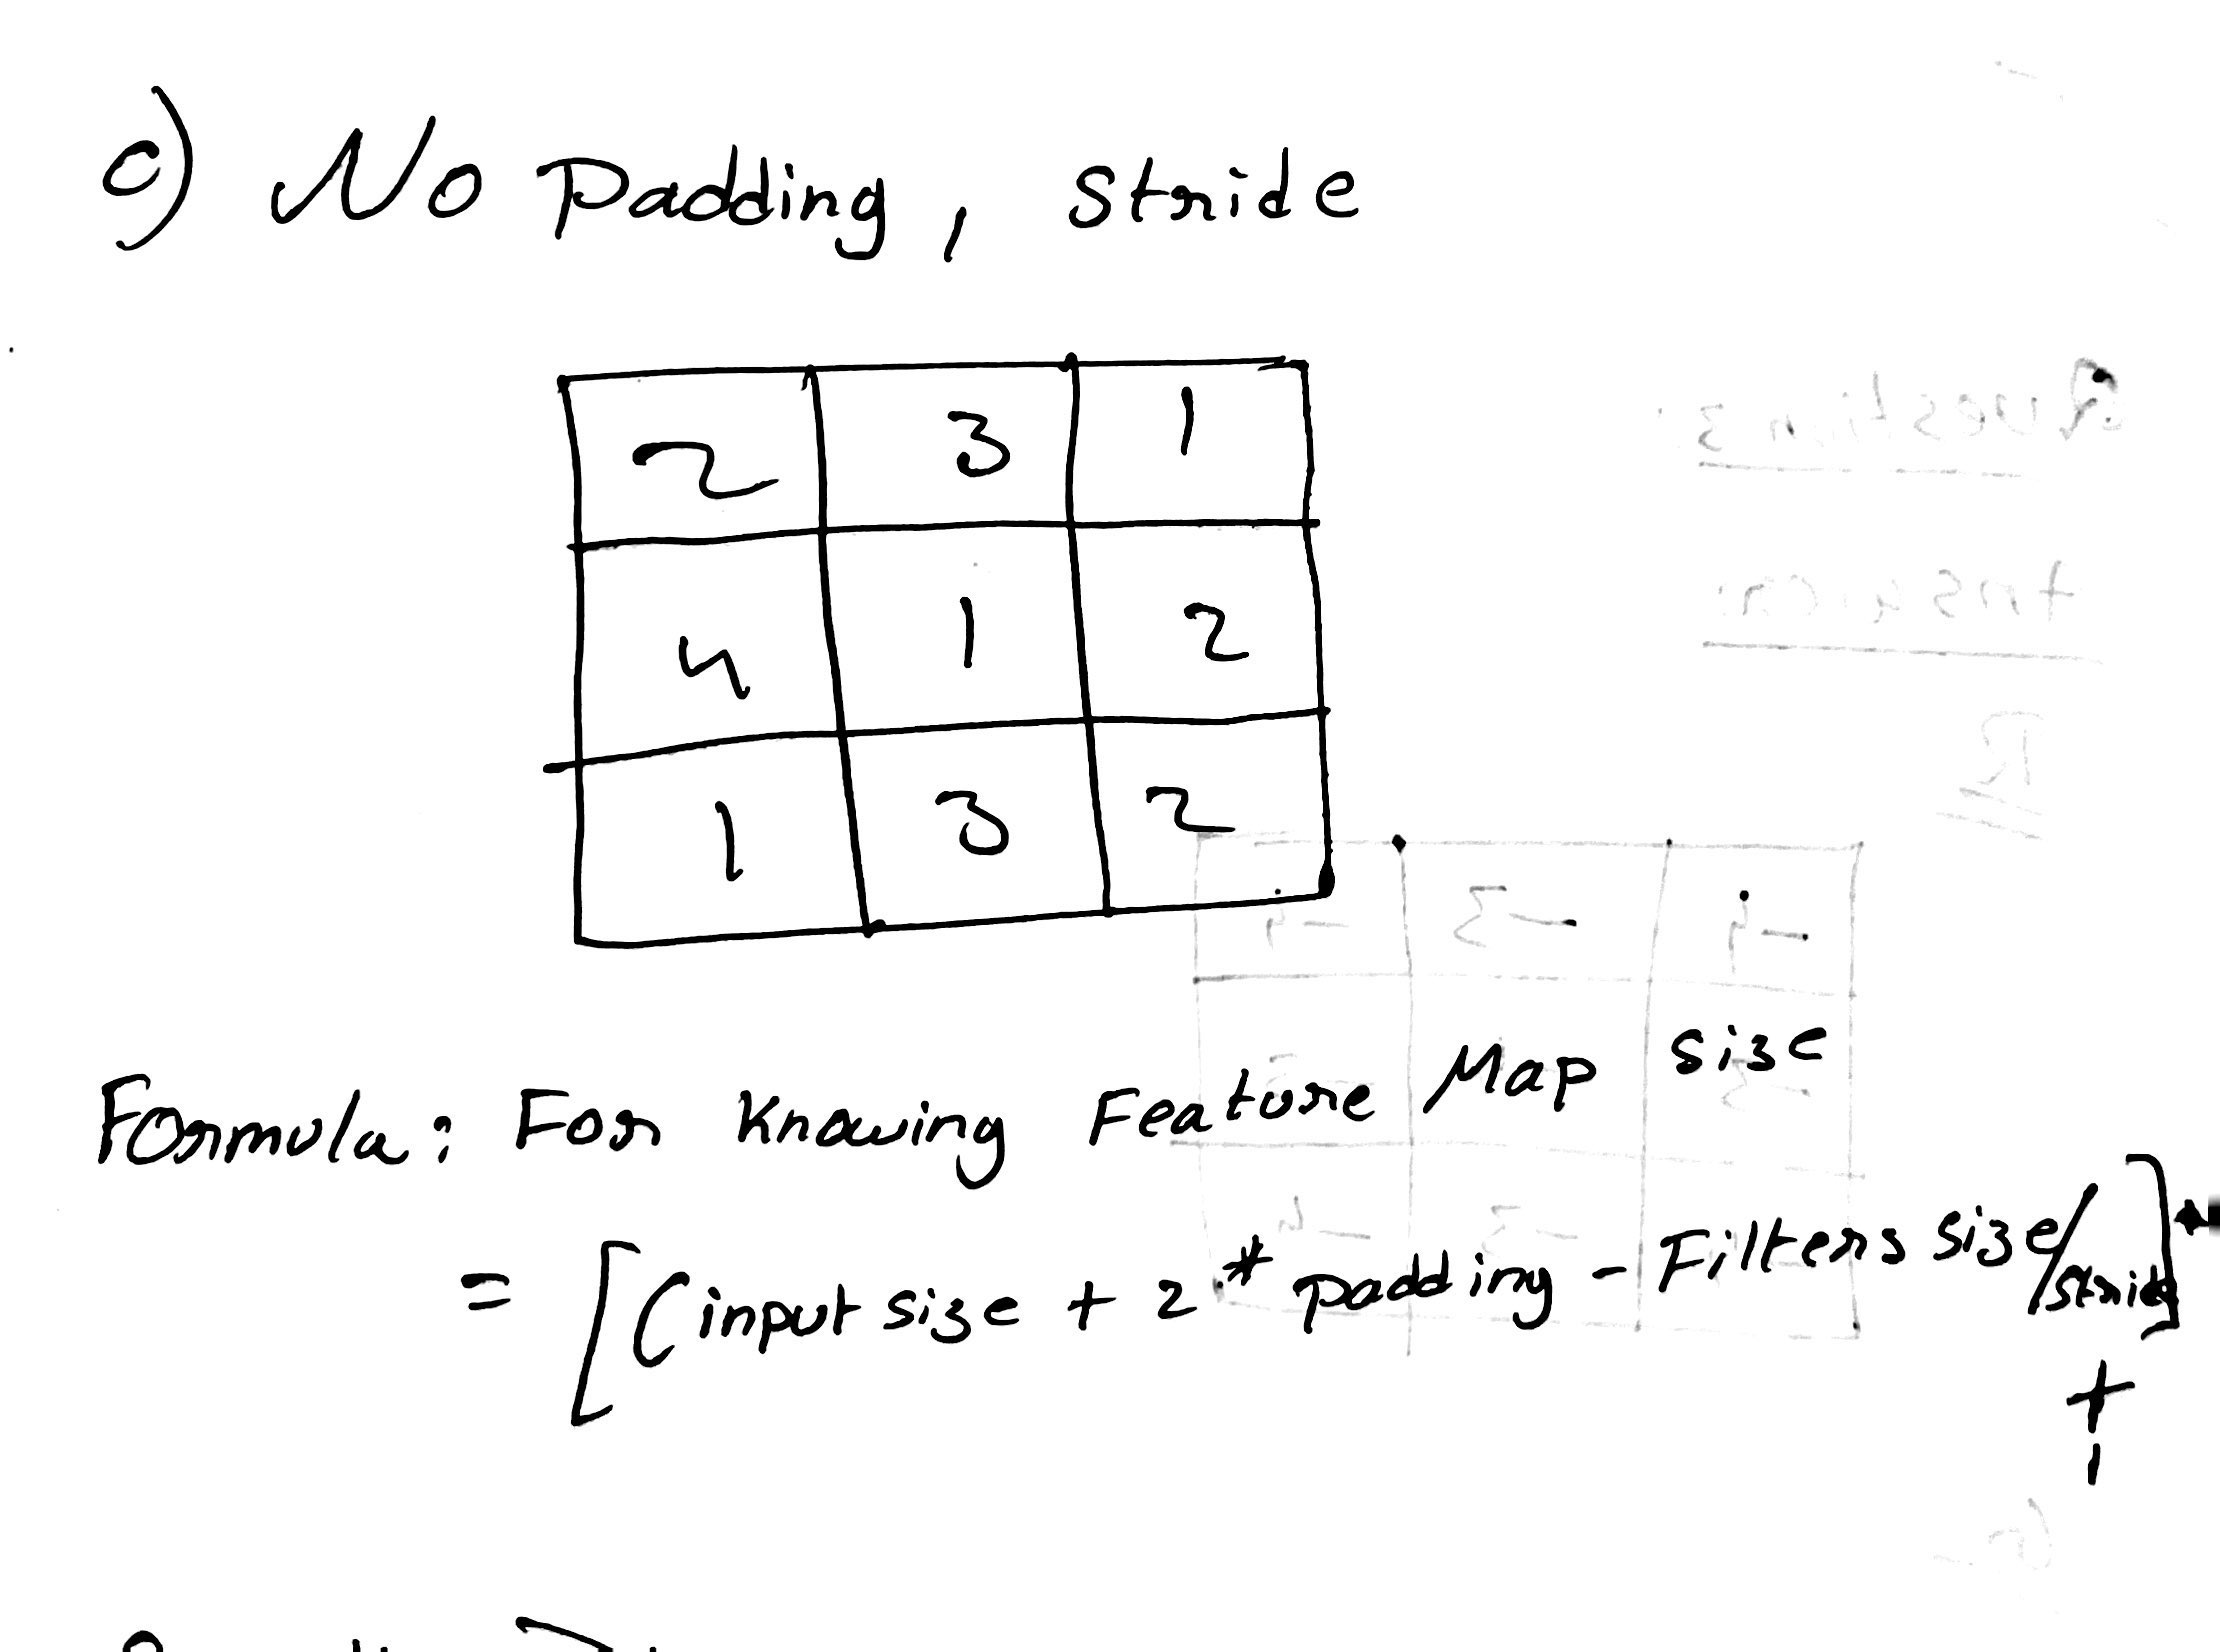

#Question 2)Answer:

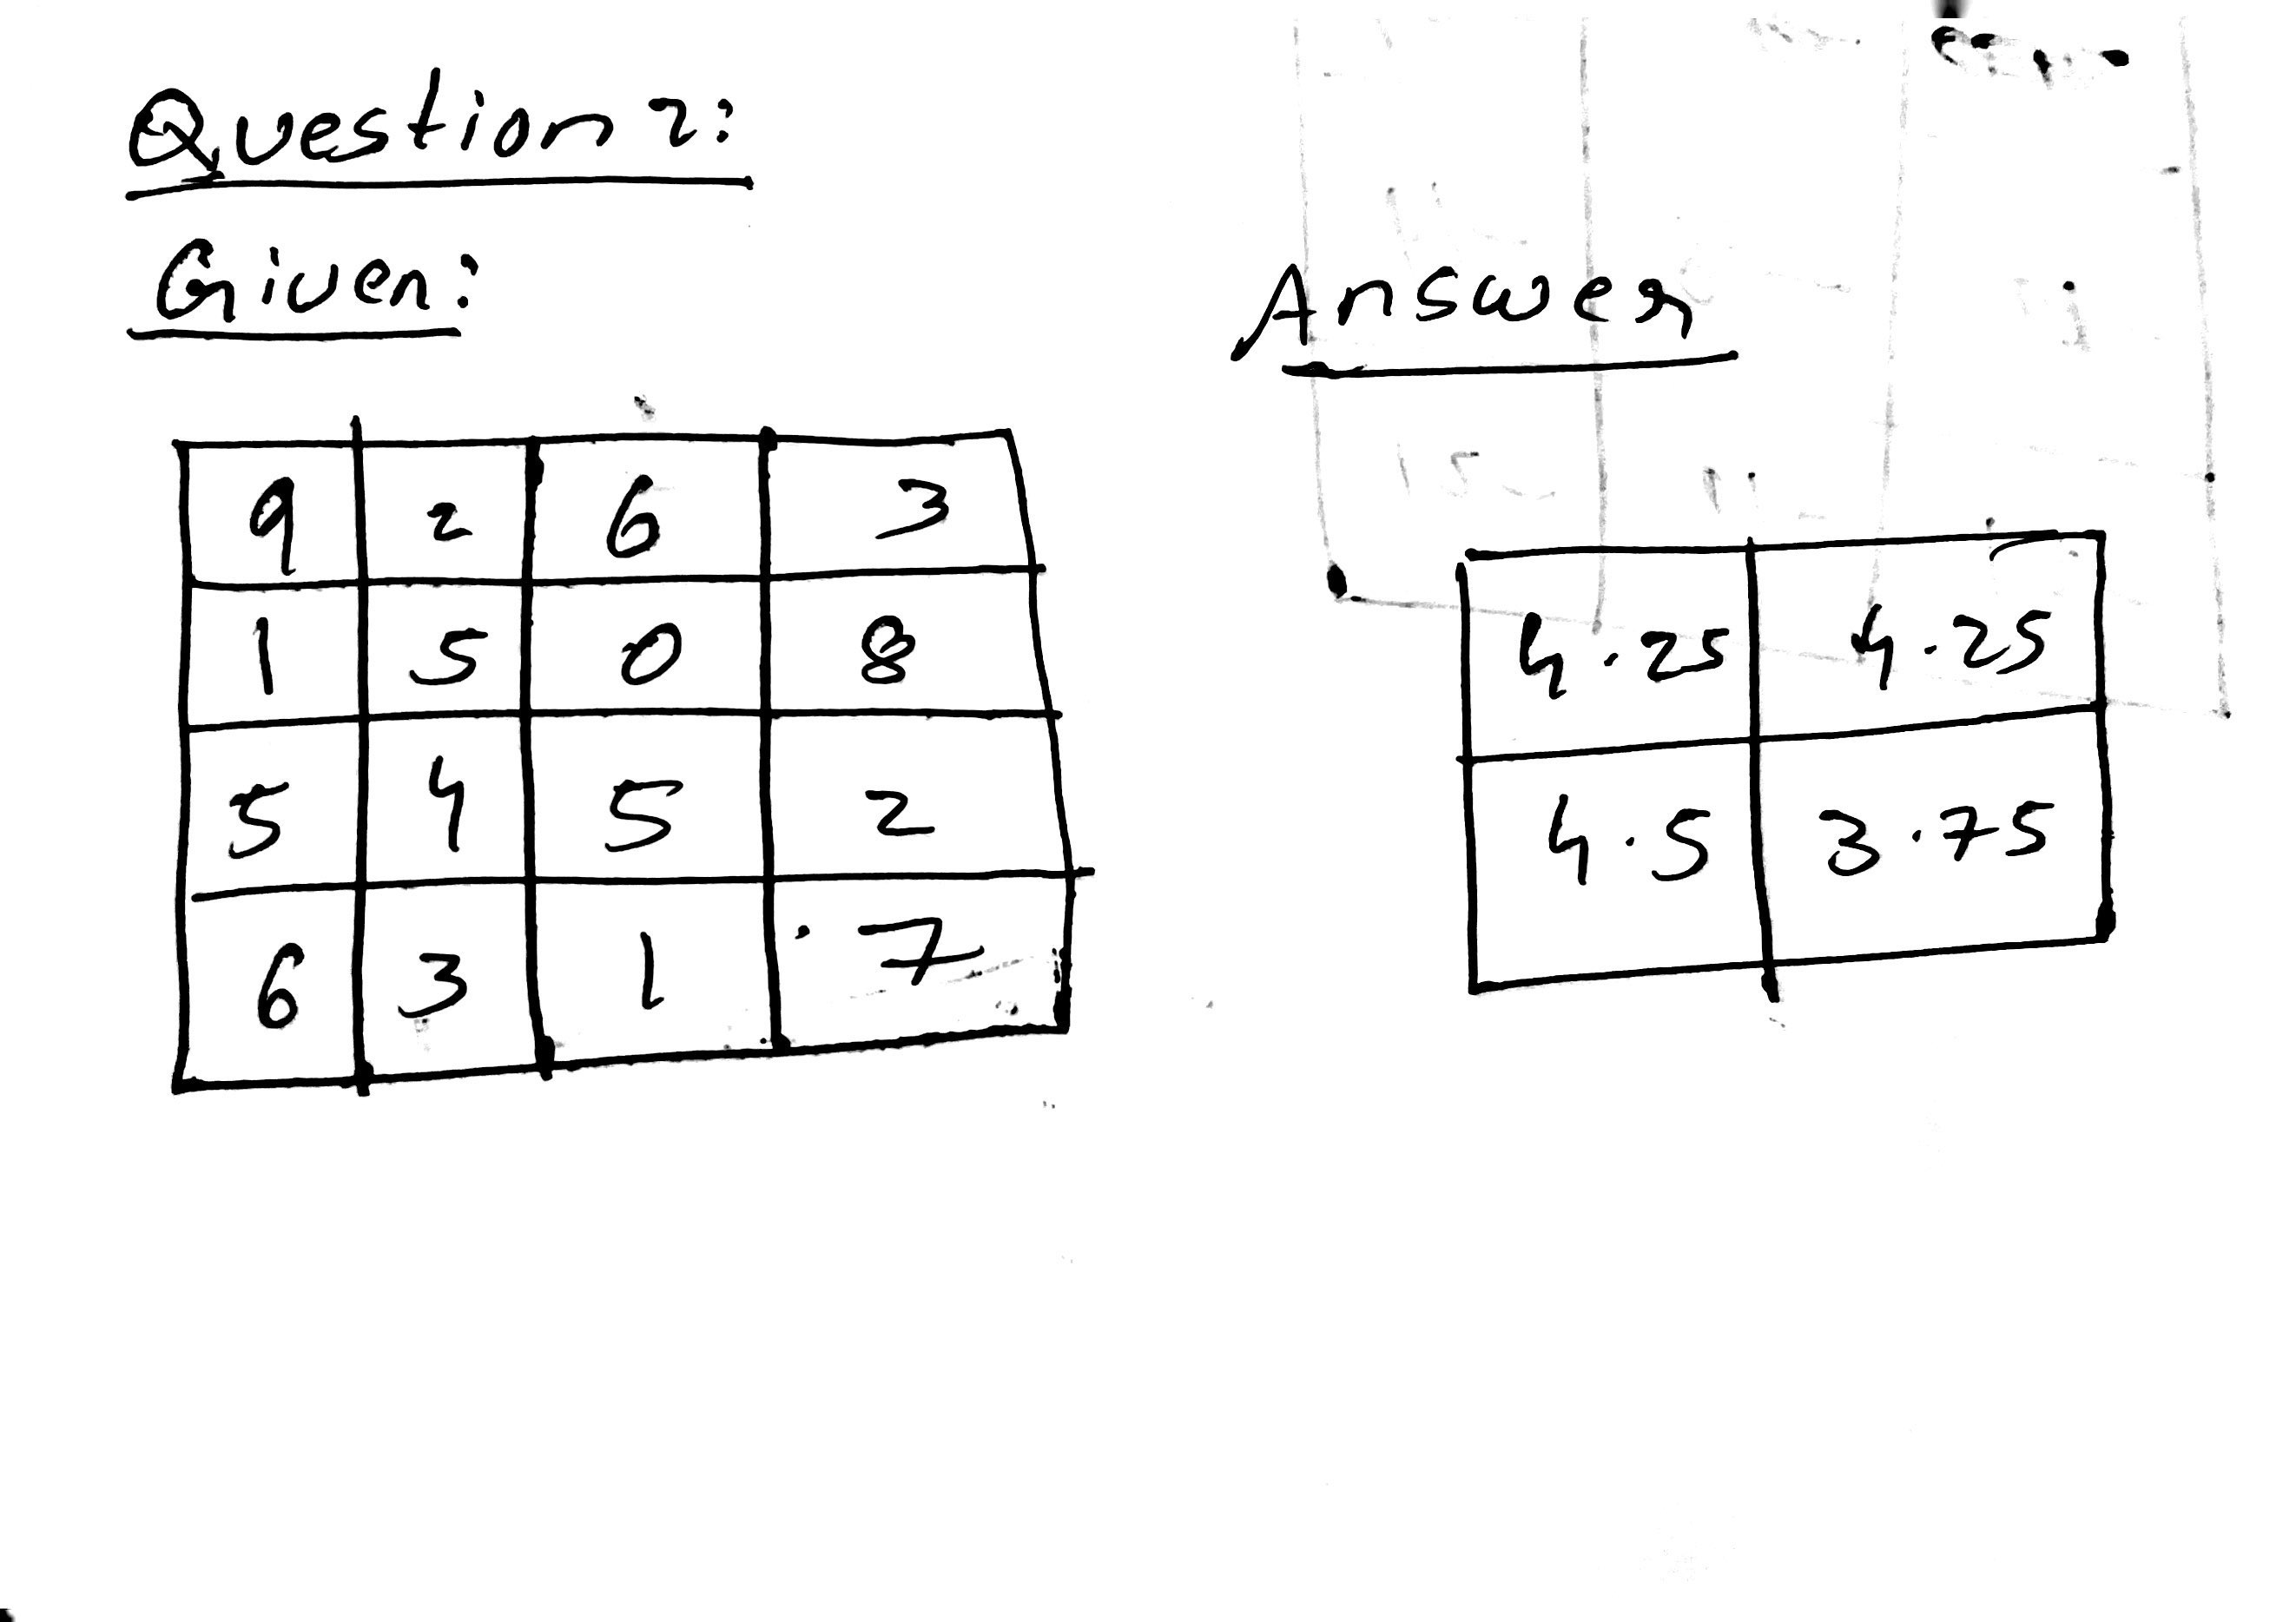

#Question 3)Answer:

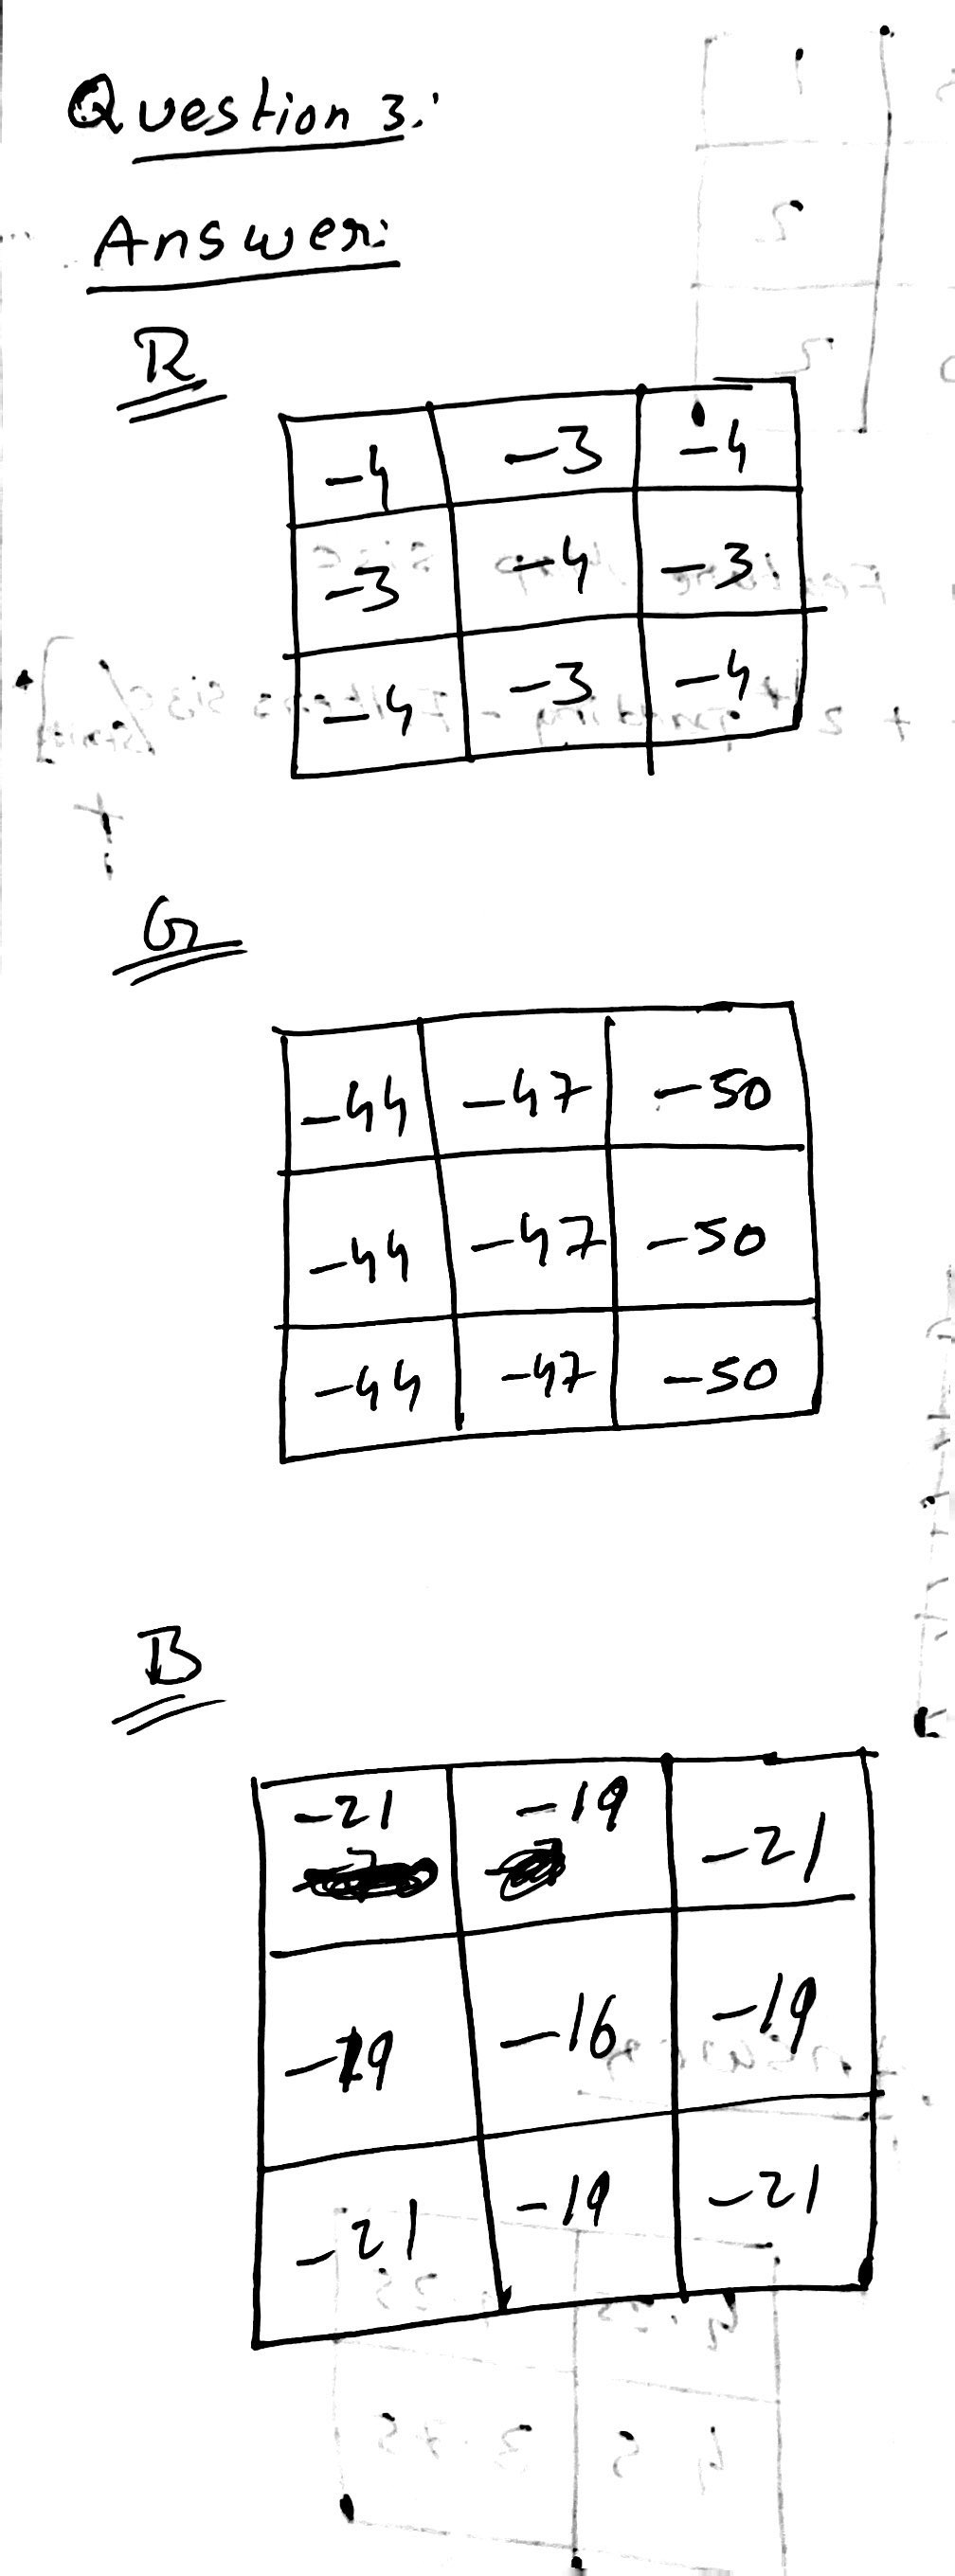

In [205]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.utils.data as data_utils
import torch.nn as nn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.optim.lr_scheduler import StepLR

#Programming Questions(Q4,Q5)

#Question 4

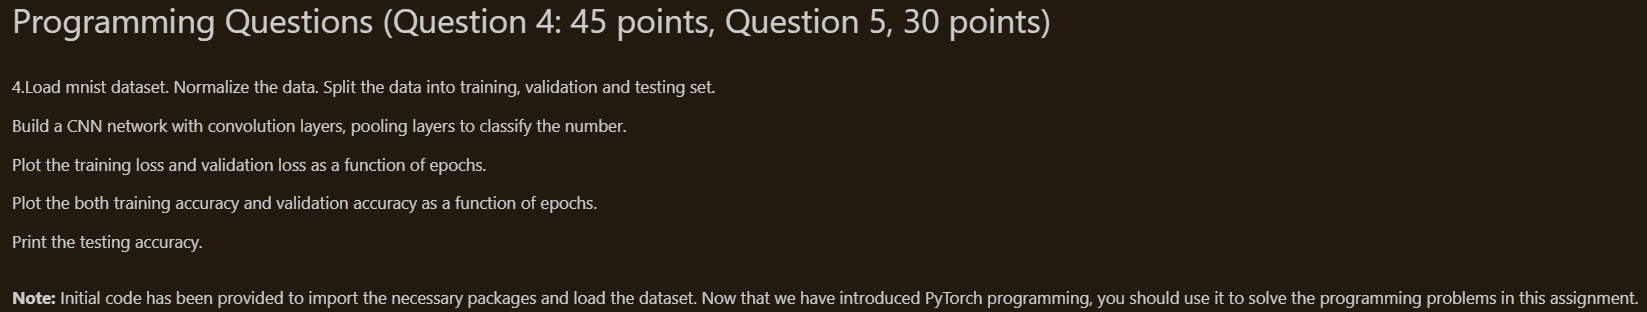

In [2]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
#Here the mean is 0.5, and the standard deviation is 0.5

In [3]:

training_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testing_data = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_dataset, val_dataset = train_test_split(training_data, test_size=0.2, random_state=69)


In [4]:
#By doing this we can manage and process data efficiently in batches.
BSize= 300
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=BSize, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=BSize, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=testing_data, batch_size=BSize, shuffle=False)
#Here for validation and test data, i am give shuffle as False and training True, by doing that can improve the training learning process.

Image 1 shape: torch.Size([28, 28])
Image 2 shape: torch.Size([28, 28])
Image 3 shape: torch.Size([28, 28])
Image 4 shape: torch.Size([28, 28])
Image 5 shape: torch.Size([28, 28])
Image 6 shape: torch.Size([28, 28])


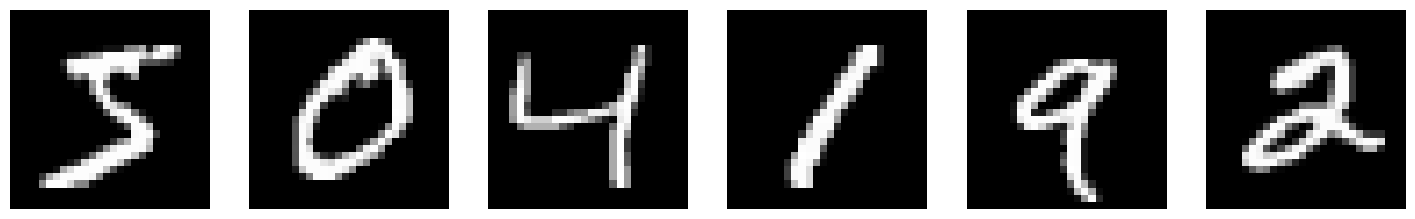

In [5]:
m, n = plt.subplots(1, 6, figsize=(18, 3))

for i, j in enumerate(n):
    img_data = training_data[i][0].squeeze()
    print(f"Image {i + 1} shape: {img_data.shape}")
    j.imshow(img_data, cmap='gray', interpolation='none')
    j.axis('off')

plt.show()


In [6]:
import torch.nn as nn

class ConNN(nn.Module):
    def __init__(self, k1, p1, k2, p2):
        super(ConNN, self).__init__()
         # Layer1: convolution and pooling layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=k1, padding=p1)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        # Layer2: convolution and pooling layers
        self.conv2 = nn.Conv2d(32, 64, kernel_size=k1, padding=p1)
        self.bn2 = nn.BatchNorm2d(64)
        # Measuring the input size of the linear layer based on the last conv2 layer.
        self.input_size = self.linear_InputSize(conv2_kernel, conv2_padding)
        # Fully Connected Layers
        self.is1 = nn.Linear(self.input_size, 128)
        self.is2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.5)

    def linear_InputSize(self, conv_kernel, conv_padding):
     # here the dummy tensor was created to calculate the output size of the convolution last layer in network.
        temp_input = torch.randn(1, 1, 28, 28) # Assuming input size of 28x28 as known in previous cell output.
        # Forward pass through the layers to get the output size
        z = self.conv1(temp_input)  #Convolution
        z = self.relu(z)       #RELU
        z = self.maxpool(z)    #Pooling
        z = self.conv2(z)     #Convolution
        z = self.relu(z)      #Relu
        z = self.maxpool(z)   #Pooling
        # input size Flattening
        return z.view(z.size(0), -1).shape[1]

    def forward(self, x):
        #layers for forword passing
        x = self.conv1(x)     #Convolution
        x = self.relu(x)      #Relu
        x = self.maxpool(x)   #Pooling
        x = self.conv2(x)     #Convolution
        x = self.relu(x)      #Relu
        x = self.maxpool(x)   #Pooling
        x = x.view(x.size(0), -1)
        x = self.is1(x)       #fully connected layers
        x = self.relu(x)      # Relu
        x = self.dropout(x)   #DropOut
        x = self.is2(x)       #fully connected layers
        return x

# Define kernel sizes and paddings (you can change these values)
conv1_kernel = 3
conv1_padding = 2
conv2_kernel = 3
conv2_padding = 2

# Create the model and passing the parameters to ConNN func.
model = ConNN(conv1_kernel, conv1_padding, conv2_kernel, conv2_padding)
# Saving the model to a file for future usage
torch.save(model.state_dict(), 'dl_cnn_model.pth')


In [7]:
#Hyperparameters

Loss_func=nn.CrossEntropyLoss() #Loss Function: Cross entropy
#Declaring optimizer with SGD and learning rate for model.
optim_model = optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-4)
#Defining the step size and gamma for learning rate
lr_scheduler = lr_scheduler.StepLR(optim_model, step_size=4, gamma=0.1)

In [8]:
#From here the training process starts
losses_train_data,losses_val_data,accuracies_train_data,accuracies_val_data =[],[],[],[]
tot_epochs=15

Epoch 1/15, Train Loss: 2.0966, Val Loss: 1.6460, Train Acc: 38.52%, Val Acc: 72.34%
Epoch 2/15, Train Loss: 1.1335, Val Loss: 0.6294, Train Acc: 69.07%, Val Acc: 85.46%
Epoch 3/15, Train Loss: 0.6361, Val Loss: 0.4121, Train Acc: 81.37%, Val Acc: 89.22%
Epoch 4/15, Train Loss: 0.4784, Val Loss: 0.3242, Train Acc: 85.99%, Val Acc: 90.92%
Epoch 5/15, Train Loss: 0.3997, Val Loss: 0.2689, Train Acc: 88.34%, Val Acc: 92.40%
Epoch 6/15, Train Loss: 0.3450, Val Loss: 0.2316, Train Acc: 90.00%, Val Acc: 93.30%
Epoch 7/15, Train Loss: 0.3041, Val Loss: 0.2068, Train Acc: 91.31%, Val Acc: 93.84%
Epoch 8/15, Train Loss: 0.2757, Val Loss: 0.1864, Train Acc: 91.99%, Val Acc: 94.46%
Epoch 9/15, Train Loss: 0.2478, Val Loss: 0.1685, Train Acc: 92.89%, Val Acc: 94.93%
Epoch 10/15, Train Loss: 0.2266, Val Loss: 0.1517, Train Acc: 93.55%, Val Acc: 95.51%
Epoch 11/15, Train Loss: 0.2108, Val Loss: 0.1427, Train Acc: 93.81%, Val Acc: 95.78%
Epoch 12/15, Train Loss: 0.1968, Val Loss: 0.1332, Train Acc: 9

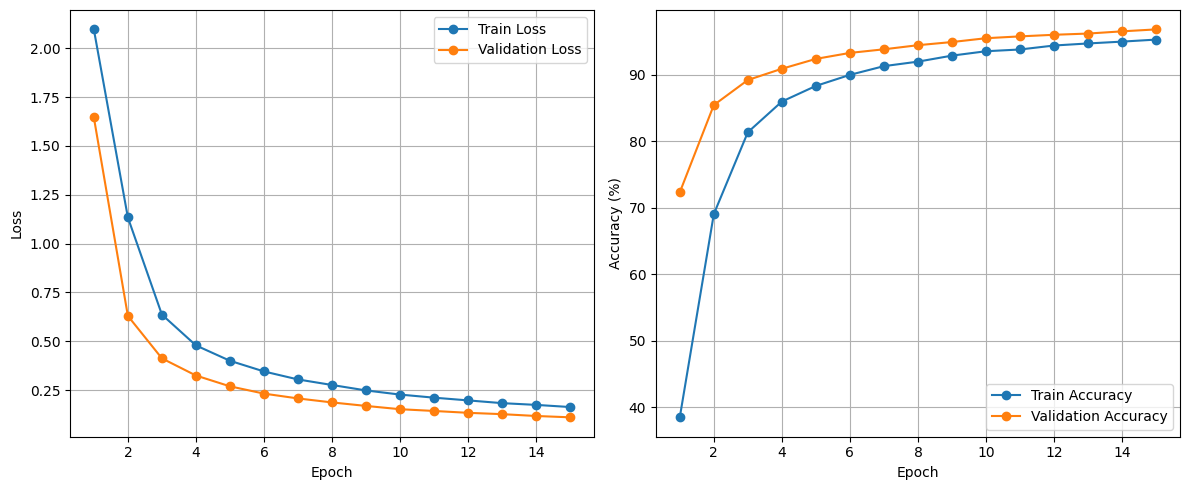

In [9]:

# Here we had defined the Loss and Optimizer functions
# Now the training process starts


for epoch in range(tot_epochs):
    torch.save(model.state_dict(), 'trained_model.pth')
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in train_loader:
        images=images.to('cuda')
        labels=labels.to('cuda')
        optim_model.zero_grad()
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        model.to(device)
        outputs = model(images)
        loss = Loss_func(outputs, labels)
        loss.backward()
        optim_model.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    accuracies_train_data.append(train_accuracy)
    losses_train_data.append(running_loss / len(train_loader))  # Corrected the position of appending

    # Validation phase
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images=images.to('cuda')
            labels=labels.to('cuda')
            outputs = model(images)
            loss = Loss_func(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_accuracy = 100 * correct_val / total_val
    accuracies_val_data.append(val_accuracy)
    losses_val_data.append(val_loss / len(val_loader))  # Corrected the position of appending

    print(f"Epoch {epoch + 1}/{tot_epochs}, "
          f"Train Loss: {losses_train_data[-1]:.4f}, "
          f"Val Loss: {losses_val_data[-1]:.4f}, "
          f"Train Acc: {accuracies_train_data[-1]:.2f}%, "
          f"Val Acc: {accuracies_val_data[-1]:.2f}%")


# Plot the training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, tot_epochs + 1), losses_train_data, label='Train Loss', marker='o')
plt.plot(range(1, tot_epochs + 1), losses_val_data, label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(1, tot_epochs + 1), accuracies_train_data, label='Train Accuracy', marker='o')
plt.plot(range(1, tot_epochs + 1), accuracies_val_data, label='Validation Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [10]:
model.eval()
ground_truth_crt = 0
tot_sum = 0

with torch.no_grad():
    for imgs, targets in test_loader:
        imgs=imgs.to('cuda')
        targets=targets.to('cuda')
        model_outputs = model(imgs)
        _, predicted = torch.max(model_outputs.data, 1)
        tot_sum += targets.size(0)
        ground_truth_crt += (predicted == targets).sum().item()

test_accuracy = 100 * ground_truth_crt / tot_sum
print(f"Accuracy on the test set: {test_accuracy}%")


Accuracy on the test set: 96.94%


#Question 5

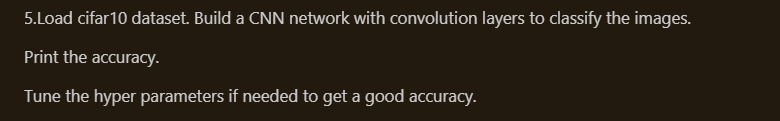

In [2]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


In [3]:
training_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
#train and validation data split using sklearn
train_data, val_data = train_test_split(training_dataset, test_size=0.2, random_state=18)

100%|██████████| 170498071/170498071 [00:01<00:00, 106415430.93it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [199]:
#By doing this we can manage and process data efficiently in batches.
BSize= 300
train_loader = data_utils.DataLoader(dataset=train_data, batch_size=BSize, shuffle=True)
val_loader = data_utils.DataLoader(dataset=val_data, batch_size=BSize, shuffle=False)
test_loader = data_utils.DataLoader(dataset=test_data, batch_size=BSize, shuffle=False)
#Here for validation and test data, i am give shuffle as False and training True, by doing that can improve the training learning process.

Image 1 shape: torch.Size([32, 32, 3])
Image 2 shape: torch.Size([32, 32, 3])
Image 3 shape: torch.Size([32, 32, 3])
Image 4 shape: torch.Size([32, 32, 3])
Image 5 shape: torch.Size([32, 32, 3])
Image 6 shape: torch.Size([32, 32, 3])


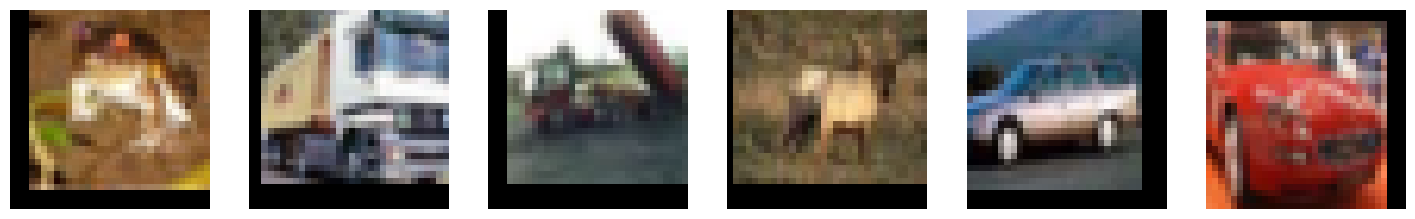

In [200]:
import numpy as np

m, n = plt.subplots(1, 6, figsize=(18, 3))

for i, j in enumerate(n):
    img_data = training_dataset[i][0].squeeze().permute(1, 2, 0)  # Transpose the image dimensions
    img_data = (img_data - img_data.min()) / (img_data.max() - img_data.min())  # Rescale to [0, 1]
    print(f"Image {i + 1} shape: {img_data.shape}")
    j.imshow(img_data, interpolation='none')
    j.axis('off')

plt.show()


In [201]:
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

class SimpleCNN(nn.Module):
    def __init__(self, kernel_size=3, padding=1):
        super(SimpleCNN, self).__init__()
        # Layer1: convolution and pooling layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=kernel_size, padding=padding)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Layer2: convolution and pooling layers
        self.conv2 = nn.Conv2d(32, 64, kernel_size=kernel_size, padding=padding)
        self.bn2 = nn.BatchNorm2d(64)

        # Layer3: convolution and pooling layers
        self.conv3 = nn.Conv2d(64, 128, kernel_size=kernel_size, padding=padding)
        self.bn3 = nn.BatchNorm2d(128)

        # Fully Connected Layers
        self.fc1 = nn.Linear(128 * 4 * 4, 256)  # Updated input size
        self.fc2 = nn.Linear(256, 10)

        # Dropout Layers for Regularization
        self.dropout = nn.Dropout(0.4)

    def forward(self, x):
        # Convolutional Layer 1
        z = self.maxpool(F.relu(self.bn1(self.conv1(x))))
        # Convolutional Layer 2
        z = F.relu(self.bn2(self.conv2(z)))
        z = self.maxpool(z)
        # Convolutional Layer 3
        z = F.relu(self.bn3(self.conv3(z)))
        z = self.maxpool(z)

        # Reshape the output to match the input size of the fully connected layer
        z = z.view(-1, 128 * 4 * 4)  # Updated reshaping

        # Fully Connected Layer 1
        z = F.relu(self.fc1(z))
        z = self.dropout(z)

        # Fully Connected Layer 2
        z = self.fc2(z)

        return z

# Initialize the simplified model
model = SimpleCNN(kernel_size=3, padding=1).to('cuda')
summary(model, (3, 32, 32))  # Adjust input size to match your actual input size


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
       BatchNorm2d-2           [-1, 32, 32, 32]              64
         MaxPool2d-3           [-1, 32, 16, 16]               0
            Conv2d-4           [-1, 64, 16, 16]          18,496
       BatchNorm2d-5           [-1, 64, 16, 16]             128
         MaxPool2d-6             [-1, 64, 8, 8]               0
            Conv2d-7            [-1, 128, 8, 8]          73,856
       BatchNorm2d-8            [-1, 128, 8, 8]             256
         MaxPool2d-9            [-1, 128, 4, 4]               0
           Linear-10                  [-1, 256]         524,544
          Dropout-11                  [-1, 256]               0
           Linear-12                   [-1, 10]           2,570
Total params: 620,810
Trainable params: 620,810
Non-trainable params: 0
-------------------------------

In [202]:
#Hyperparameters

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  #weight decay(regularization)
# Lr scheduler
max_lr = 0.05
total_steps = 100  # Adjust based on your training setup
lr_scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, total_steps=total_steps, epochs=50, steps_per_epoch=len(train_loader))




In [203]:
def calculate_validation_loss(model, val_loader, criterion):
    model.eval()  # Set the model to evaluation mode
    val_loss, total ,correct = 0.0,0,0



    with torch.no_grad():
        for data in val_loader:
            inputs, labels = data
            inputs = inputs.to('cuda')
            labels = labels.to('cuda')

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    avg_val_loss = val_loss / len(val_loader)
    print(f"Validation Loss: {avg_val_loss:.4f}, Accuracy: {accuracy:.2f}%")

    return avg_val_loss

# Training loop with increased number of epochs
num_epochs = 50  # Increased epochs

for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()  # Set the model to training mode
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader)}")

    # Calculate validation loss here, e.g., using a validation DataLoader
    validation_loss = calculate_validation_loss(model, val_loader, criterion)

    # Adjust the learning rate based on validation loss
    lr_scheduler.step(validation_loss)


Epoch 1/50, Loss: 1.8363242149353027
Validation Loss: 1.5422, Accuracy: 42.52%
Epoch 2/50, Loss: 1.4766681754767006
Validation Loss: 1.3428, Accuracy: 50.04%
Epoch 3/50, Loss: 1.2917009147245493
Validation Loss: 1.1804, Accuracy: 56.86%
Epoch 4/50, Loss: 1.1615087180884915
Validation Loss: 1.1136, Accuracy: 59.62%
Epoch 5/50, Loss: 1.073256556222688
Validation Loss: 1.1930, Accuracy: 59.01%
Epoch 6/50, Loss: 1.0215891924367022
Validation Loss: 0.9598, Accuracy: 65.77%
Epoch 7/50, Loss: 0.9434894083151176
Validation Loss: 0.9598, Accuracy: 66.07%
Epoch 8/50, Loss: 0.8958458251027919
Validation Loss: 0.9291, Accuracy: 66.72%
Epoch 9/50, Loss: 0.8389947405501977
Validation Loss: 1.0881, Accuracy: 62.45%
Epoch 10/50, Loss: 0.8118516664896438
Validation Loss: 0.8942, Accuracy: 68.17%
Epoch 11/50, Loss: 0.7643120053099163
Validation Loss: 0.8350, Accuracy: 70.55%
Epoch 12/50, Loss: 0.7230615967245244
Validation Loss: 0.8958, Accuracy: 69.08%
Epoch 13/50, Loss: 0.6948587938920775
Validation L

In [204]:
# Evaluate the model on the test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data

        inputs=inputs.to('cuda')
        labels=labels.to('cuda')
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')

Test Accuracy: 72.51%
